In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as  mpatches
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

/opt/homebrew/Caskroom/miniconda/base/envs/subhalos/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
plt.style.use('../paper/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches

In [3]:
fixed = [False, True, False, False, True, False]

fid_values = [2.0, 0.2]

fiducial = jsm_mcmc.Chain("../../mcmc/inference_tests/added_stats/added_stats_s30/mock_og/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

plus2 = jsm_mcmc.Chain("../../mcmc/inference_tests/added_stats/added_stats_s30/mock_plus2/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

plus3 = jsm_mcmc.Chain("../../mcmc/inference_tests/added_stats/added_stats_s30/mock_plus3/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

total = jsm_mcmc.Chain("../../mcmc/inference_tests/added_stats/added_stats_s30/mock_tot/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)


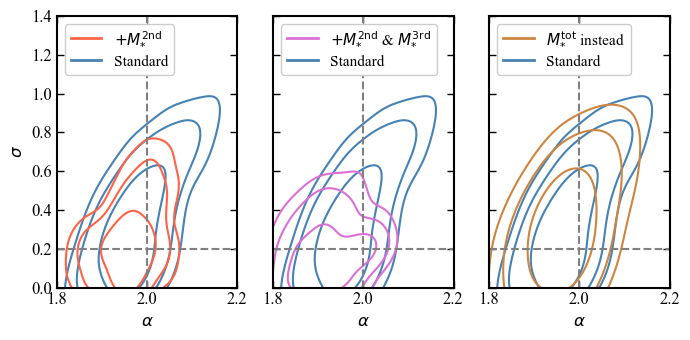

In [8]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(double_textwidth, single_textwidth))

sns.kdeplot(x=fiducial.clean[:, 0], y=fiducial.clean[:, 1], ax=axes[0], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")
sns.kdeplot(x=plus2.clean[:, 0], y=plus2.clean[:, 1], ax=axes[0], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="tomato")
axes[0].legend(handles=[Line2D([], [], color='tomato', lw = 2), Line2D([], [], color='steelblue', lw = 2)], labels=["$+ M_{*}^{\mathrm{2nd}}$", "Standard"], fontsize=11, loc=2, framealpha=1)

sns.kdeplot(x=fiducial.clean[:, 0], y=fiducial.clean[:, 1], ax=axes[1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")
sns.kdeplot(x=plus3.clean[:, 0], y=plus3.clean[:, 1], ax=axes[1], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="orchid")
axes[1].legend(handles=[Line2D([], [], color='orchid', lw = 2), Line2D([], [], color='steelblue', lw = 2)], labels=["$+ M_{*}^{\mathrm{2nd}}$ & $M_{*}^{\mathrm{3rd}}$", "Standard"], fontsize=11, loc=2, framealpha=1)

sns.kdeplot(x=fiducial.clean[:, 0], y=fiducial.clean[:, 1], ax=axes[2], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="steelblue")
sns.kdeplot(x=total.clean[:, 0], y=total.clean[:, 1], ax=axes[2], levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=3, color="peru")
axes[2].legend(handles=[Line2D([], [], color='peru', lw = 2), Line2D([], [], color='steelblue', lw = 2)], labels=["$M_{*}^{\mathrm{tot}}$ instead", "Standard"], fontsize=11, loc=2, framealpha=1)

# myHandle = [Line2D([], [], color='peru', lw = 2), Line2D([], [], color='darkorange', lw = 2), Line2D([], [], color='crimson', lw = 2),  Line2D([], [], color='darkviolet', lw = 2), Line2D([], [], color='steelblue', lw = 2)]
# # fig.legend(handles = myHandle, labels=["$\log M_{*}^{\mathrm{lim}}=7.5$", "$\log M_{*}^{\mathrm{lim}}=5.5$", "$N_{\mathrm{host}}=300$", "$N_{\mathrm{host}}=1000$", "Fiducial Model"], ncols=3, loc="upper center", bbox_to_anchor=(0.5, 1.2), framealpha=1)

for ax in axes.flatten():
    ax.axhline(0.2, ls="--", color="grey")
    ax.axvline(2.0, ls="--", color="grey")
    ax.set_xlabel("$\\alpha$")
    ax.set_ylabel("$\sigma$")
    ax.set_ylim(0, 1.4)
    ax.set_xlim(1.8, 2.2)

plt.tight_layout()
plt.savefig("../../../paper_1/figures/aux/added_stats_S30.pdf", bbox_inches="tight")
plt.show()

In [47]:
total.constraints

['$1.99_{-0.024}^{+0.037}$', '$0.13_{-0.116}^{+0.240}$']

In [45]:
fiducial.constraints

['$1.99_{-0.024}^{+0.048}$', '$0.14_{-0.128}^{+0.288}$']